True :s23
predicted:s23

I think this person belongs to class: s23


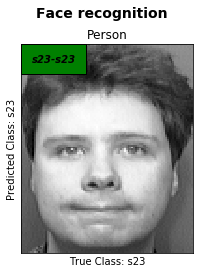

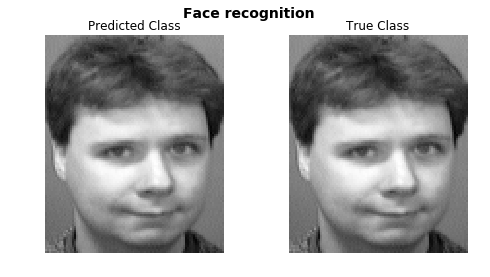

True :s21
predicted:s21

I think this person belongs to class: s21


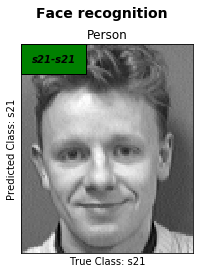

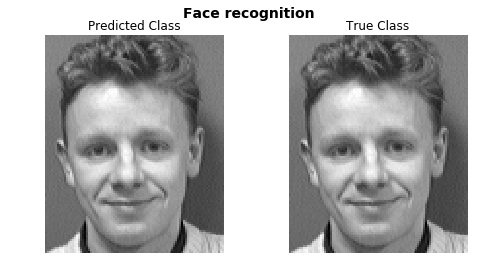

True :s6
predicted:s6

I think this person belongs to class: s6


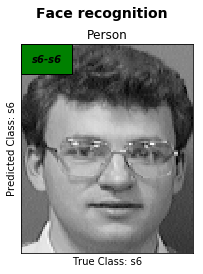

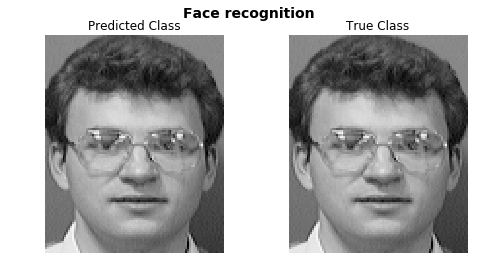

True :s18
predicted:s18

I think this person belongs to class: s18


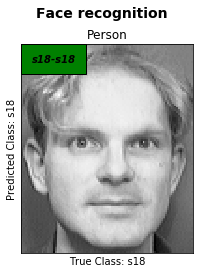

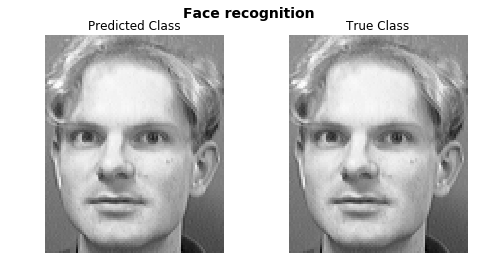

True :s8
predicted:s8

I think this person belongs to class: s8


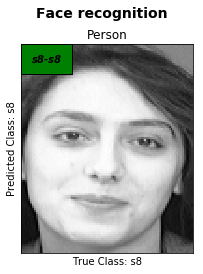

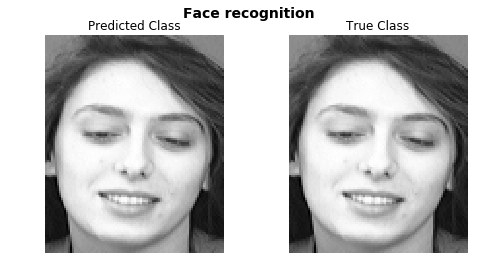

True :s5
predicted:s5

I think this person belongs to class: s5


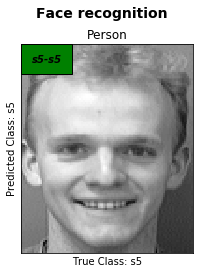

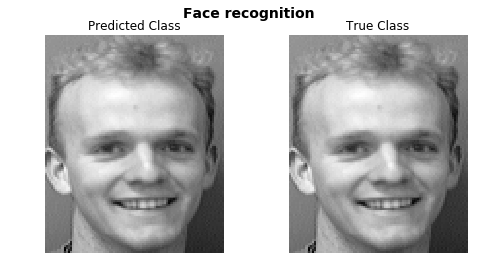

True :s15
predicted:s15

I think this person belongs to class: s15


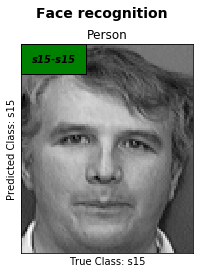

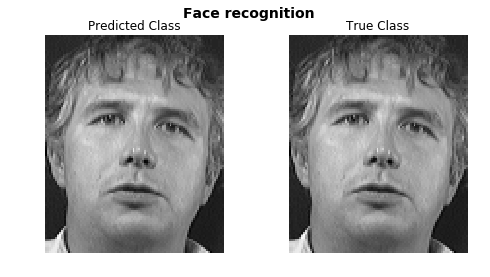

True :s34
predicted:s34

I think this person belongs to class: s34


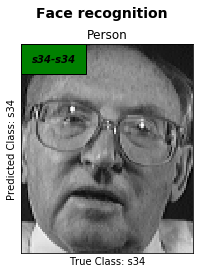

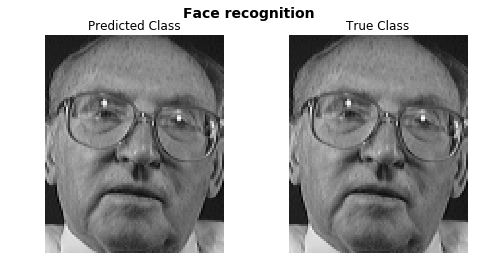

True :s19
predicted:s40

I think this person belongs to class: s40


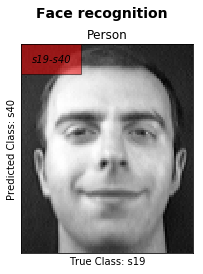

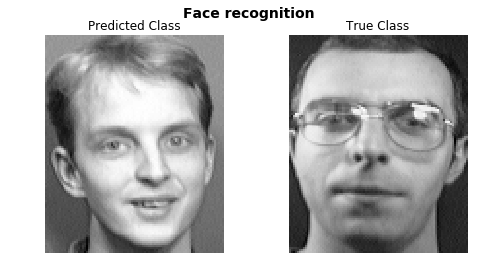

True :s21
predicted:s21

I think this person belongs to class: s21


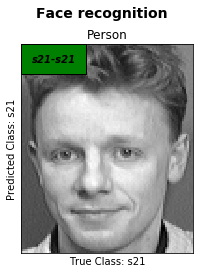

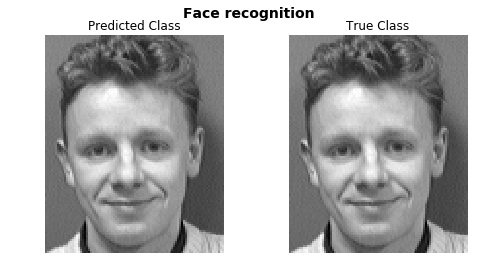

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os
import pandas as pd
from sklearn.externals import joblib
from skimage.color import rgb2gray
from skimage import exposure, feature, transform

rootpath = '../data/orl_faces/'

def get_csvfiles(rootpath):
    import re
    csvfiles = []
    root = pathlib.Path(rootpath)
    dirlist = pathlib.os.listdir(root)
    dirs = sorted([x for x in dirlist if re.search(r"^s", x)])
    for i, name in enumerate(dirs):
        for root1, dirs1, files1 in pathlib.os.walk(pathlib.os.path.join(root, name)):
            csvfile = ([pathlib.os.path.join(root, name,x) for x in files1 if re.search(r"^FR", x)])
            csvfiles.append(csvfile[0])
    return csvfiles

def getdata_from_csv(csvfiles):
    images = []
    labels = []
    for csvfile in csvfiles:
        csvpath = csvfile
        dirpath = '/'.join(csvpath.split('/')[:-1])
        df1 = pd.read_csv(csvpath)
        for im_index in range(0,len(df1)):
            im_path = '/'.join([dirpath,df1.iloc[im_index,0]])
            img = plt.imread(im_path)
            images.append(img)

            lbl = df1.iloc[im_index,1]
            labels.append(lbl)
    return images, labels


def get_trueclass_img(true_label,rootpath='../data/orl_faces/'):
    trueClass_path = ''.join([rootpath,true_label])
    trueClass_image = os.listdir(trueClass_path)[1]
    trueClass_imagepath = '/'.join([trueClass_path,trueClass_image])
    true_img = plt.imread(trueClass_imagepath)
    return true_img

def get_predclass_img(pred_label,rootpath='../data/orl_faces/'):
    predClass_path = ''.join([rootpath,pred_label])
    predClass_image = os.listdir(predClass_path)[1]
    predClass_imagepath = '/'.join([predClass_path,predClass_image])
    pred_img = plt.imread(predClass_imagepath)
    return pred_img

def show_pair(img1,img2):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
    fig.suptitle('Face recognition', fontsize=14, fontweight='bold')
    
    ax1.axis('off')
    ax1.imshow(img2,cmap=plt.cm.gray )
    ax1.set_title('Predicted Class')
    ax1.set_adjustable('box-forced')

    ax2.axis('off')
    ax2.imshow(img1, cmap=plt.cm.gray)
    ax2.set_title('True Class')
    ax1.set_adjustable('box-forced')
    plt.show()

def face_recognize():
    n = np.random.randint(0, high=len(y))
    test_img =X[n]
    true_label = y[n]
    true_img = get_trueclass_img(true_label,rootpath='../data/orl_faces/')

    fig = plt.figure()
    fig.suptitle('Face recognition', fontsize=14, fontweight='bold')
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)
    ax.set_title('Person')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

    gray_img = rgb2gray(test_img)
    (test_img_feat, hogImage) = feature.hog(gray_img, orientations=9, pixels_per_cell=(8,8),
        cells_per_block=(2,2), block_norm='L2-Hys', transform_sqrt=True, visualise=True)
    #     temp = temp.reshape(1,-1) 
    test_img_feat = test_img_feat.reshape(1, -1)
    
    if os.path.isfile("../data/clf/clf_svc_hog.pkl"):
        svc = joblib.load("../data/clf/clf_svc_hog.pkl")
        
    pred_label = svc.predict(test_img_feat)[0]
    pred_img = get_predclass_img(pred_label,rootpath='../data/orl_faces/')
    print("==========")
    print("True :{}\npredicted:{}\n".format(true_label,pred_label))
    # show the prediction
    print("I think this person belongs to class: {}".format(pred_label))
    print("==========")

    ax.set_xlabel('True Class: {}'.format(true_label))
    ax.set_ylabel('Predicted Class: {}'.format(pred_label))
    mytext = '{}-{}'.format(true_label,pred_label)
    if (true_label==pred_label):
        ax.text(5, 9.12,mytext, style='italic',bbox={'facecolor':'green', 'alpha':1, 'pad':10}, fontweight='bold')
    else:
        ax.text(5, 9.12, mytext, style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
    ax.imshow(test_img,cmap='gray')
    plt.show()

    show_pair(true_img, pred_img)

csvfiles = get_csvfiles(rootpath)
X, y = getdata_from_csv(csvfiles)
for i in range(10):
    face_recognize()